# <font color='red'>importing the libraries</font>

In [107]:
import pandas as pd
import numpy as np
%matplotlib notebook
import csv
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
from scipy.interpolate import *
# import scipy.interpolate as sc

In [108]:
ls

combine_csvfiles.ipynb  Data_in_out.csv
cv2_install_test.py     Dataset.ipynb
D1R1_19_Feb_2018.csv    destructive.ipynb
D2R1_12_Mar_2018.csv    destructive.py
D2R1_22_Feb_2018.csv    ground_truth_data.csv
D3R1_12_Mar_2018.csv    ground_truth_data_interpolated.csv
D3R1_27_Mar_2018.csv    Ground_truth.ipynb
D3R2_27_Mar_2018.csv    Hyper_data_with_groundtruth.csv
data_12_mar_2018/       read_me_12_mar_2018.txt
data_19_22_feb_2018/    read_me_19_22_feb_2018
data_27_mar_2018/       read_me_corn_27_mar_18.txt


# <font color='red'>import data and describe the data</font>

In [109]:
data=pd.read_csv("ground_truth_data_interpolated.csv",header=0) 
data.head()
# data_mod=data.iloc[12:,:]
# data_mod.head(13)

,Plot_Code,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
0,D2R1I2N3,101,1.190,20.723,3.917,11.90,17.414286,4.866667,68.0
1,D2R1I2N2,101,0.891,17.949,6.053,8.91,20.144781,4.266667,58.0
2,D2R1I1N1,101,0.691,16.340,7.077,6.91,23.646889,4.766667,55.0
3,D2R1I3N3,101,0.788,17.386,7.285,7.88,22.063452,3.733333,58.0
4,D2R1I3N2,101,0.820,16.297,7.189,8.20,19.874390,4.533333,60.0


In [110]:
data.describe()

,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,114.833333,1.690590,32.958618,5.922264,16.905903,20.274777,4.271759,62.814575
std,8.292199,0.635111,10.342057,1.170489,6.351113,4.805979,0.533419,6.532327
min,101.000000,0.691000,14.693000,2.427000,6.910000,11.666483,2.966667,25.500000
25%,107.000000,1.284500,21.681250,5.356625,12.845000,16.648919,3.992500,60.000000
50%,118.500000,1.644000,38.388500,5.730500,16.440000,20.229199,4.285000,63.800571
75%,122.000000,2.034500,39.738500,6.709250,20.345000,23.679493,4.594167,66.203186
max,122.000000,3.336000,53.418000,8.628000,33.360000,30.828767,5.500000,80.300000


# <font color='red'>storing columns in seperate variables and plotting scatterplot and correlation</font>

<IPython.core.display.Javascript object>


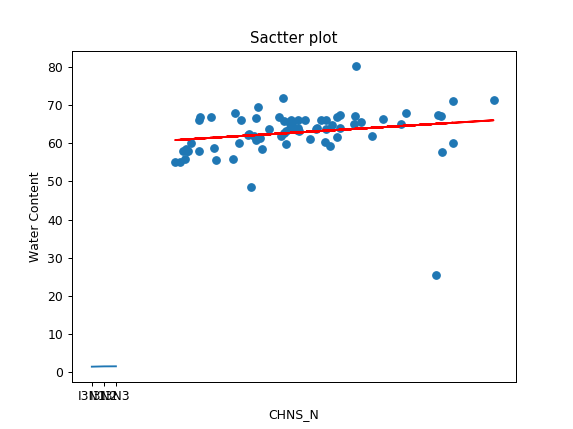

[  0.19639566  59.49432949]


Text(0,0.5,'Water Content')

In [126]:
# plt.figure()
CHNS_N=data["N_mg_by_g"]
NA_N=data["NA_avg_N_mg_by_g"]
CNR=data["CN_ratio"]
Water=data["Water_percent"]
Carbon=data["C_percent"]
Hydrogen=data["H_percent"]
# sub1=plt.subplot(1,2,1)
# plt.scatter(CHNS_N,Water)
# plt.title("x-NA vs y-CHNS N content (mg/g)")
# sub2=plt.subplot(1,2,2)
# plt.hist(NA_N, bins=10)
# plt.hist(CNR, bins=10)
# plt.hist(Carbon,bins=10)
# plt.title("Historam of various data")
fig, ax = plt.subplots()
fit=np.polyfit(CHNS_N, Water, deg=1)
print(fit)
ax.plot(CHNS_N,fit[0] * CHNS_N + fit[1], color='r')
ax.scatter(CHNS_N,Water)
plt.title("Sactter plot")
plt.xlabel("CHNS_N")
plt.ylabel("Water Content")

<IPython.core.display.Javascript object>


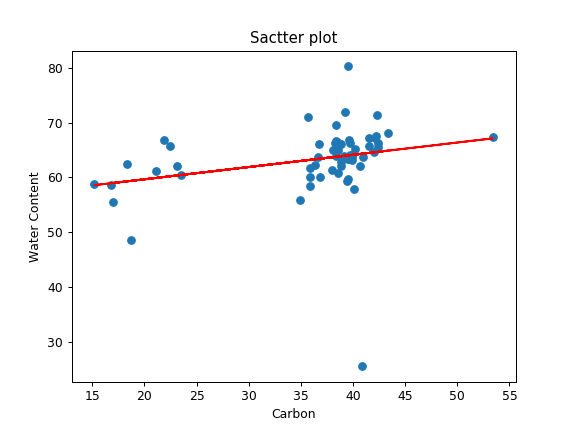

[  0.22382305  55.16768926]


Text(0,0.5,'Water Content')

In [85]:
fig, ax = plt.subplots()
fit=np.polyfit(Carbon, Water, deg=1)
print(fit)
ax.plot(Carbon,fit[0] * Carbon + fit[1], color='r')
ax.scatter(Carbon,Water)
plt.title("Sactter plot")
plt.xlabel("Carbon")
plt.ylabel("Water Content")


** <font color='red'>Another method to plot trendline</font>**

<IPython.core.display.Javascript object>


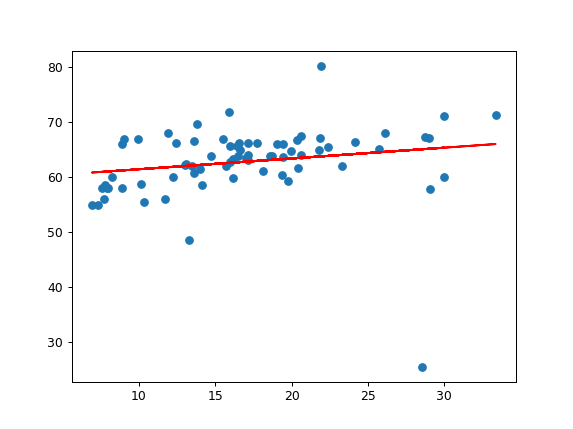

In [113]:
plt.figure()
p1=np.polyfit(CHNS_N,Water,1)
plt.plot(CHNS_N,Water, 'o')
plt.plot(CHNS_N, np.polyval(p1,CHNS_N),'r-')

<IPython.core.display.Javascript object>


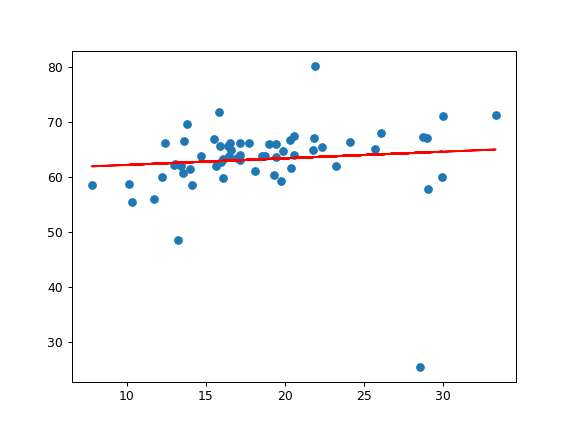

In [106]:
plt.figure()
plt.plot(CHNS_N,Water, 'o')
p1=np.polyfit(CHNS_N,Water,1)
# p2=np.polyfit(CHNS_N,Water,2)
# p3=np.polyfit(CHNS_N,Water,3)
plt.plot(CHNS_N, np.polyval(p1,CHNS_N),'r-')
# plt.plot(CHNS_N, np.polyval(p2,CHNS_N),'b--')
# plt.plot(CHNS_N, np.polyval(p3,CHNS_N),'m:')

In [114]:
np.corrcoef(CHNS_N, Water)

array([[ 1.        ,  0.19094743],
       [ 0.19094743,  1.        ]])

In [115]:
print("CHNS_N vs NA_N corr: ")
print(CHNS_N.corr(NA_N))
print("CHNS_N vs Carbon corr: ")
print(CHNS_N.corr(Carbon))
print("Water vs Hydrogen corr: ")
print(Water.corr(Hydrogen))
print("CHNS_N vs CNR: ")
print(CHNS_N.corr(CNR))
print("Carbon vs CNR: ")
print(Carbon.corr(CNR))
print("CHNS_N vs Water: ")
print(CHNS_N.corr(Water))
print("Carbon vs Water: ")
print(Carbon.corr(Water))

CHNS_N vs NA_N corr: 
0.0349927410249
CHNS_N vs Carbon corr: 
0.72090577642
Water vs Hydrogen corr: 
-0.0153525257955
CHNS_N vs CNR: 
-0.437790985134
Carbon vs CNR: 
0.273112169686
CHNS_N vs Water: 
0.190947428158
Carbon vs Water: 
0.289530669109


# <font color='red'>below is the spearman correlation which is generally used for categorical data. So don't use this method for contineous data, like in this case. Only see DAS correlation with others from this table</font>

**<font color='green'>Note: If you think the relationship is linear, Pearson is better. If you don’t, Spearman is better. Also , if number of data points are high then pearson is good while if number of datapoints are low then spearman is good</font>**

In [116]:
data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
DAS,1.0,0.32,0.5,-0.028,0.32,0.45,-0.21,0.21
N_percent,0.32,1.0,0.78,-0.17,1.0,-0.39,-0.016,0.43
C_percent,0.5,0.78,1.0,0.079,0.78,0.11,-0.21,0.43
H_percent,-0.028,-0.17,0.079,1.0,-0.17,0.21,-0.021,-0.051
N_mg_by_g,0.32,1.0,0.78,-0.17,1.0,-0.39,-0.016,0.43
CN_ratio,0.45,-0.39,0.11,0.21,-0.39,1.0,-0.28,-0.089
NA_avg_N_mg_by_g,-0.21,-0.016,-0.21,-0.021,-0.016,-0.28,1.0,-0.16
Water_percent,0.21,0.43,0.43,-0.051,0.43,-0.089,-0.16,1.0


**Below is the conclusion**
    1. Carbon content is positively correlated with DAS (0.5)
    2. CNR is also positively correlated with DAS (0.45)

# <font color = 'red'>pearson correlation is used for contineous data, as shown below</font>

In [117]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
DAS,1.0,0.26,0.61,-0.065,0.26,0.35,-0.17,0.19
N_percent,0.26,1.0,0.72,-0.12,1.0,-0.44,0.035,0.19
C_percent,0.61,0.72,1.0,0.039,0.72,0.27,-0.18,0.29
H_percent,-0.065,-0.12,0.039,1.0,-0.12,0.25,-0.053,-0.015
N_mg_by_g,0.26,1.0,0.72,-0.12,1.0,-0.44,0.035,0.19
CN_ratio,0.35,-0.44,0.27,0.25,-0.44,1.0,-0.31,0.044
NA_avg_N_mg_by_g,-0.17,0.035,-0.18,-0.053,0.035,-0.31,1.0,-0.062
Water_percent,0.19,0.19,0.29,-0.015,0.19,0.044,-0.062,1.0


**Below is the conclusion:**
    1. There is no correlation between CHNS_N and NA_N. It suggests that the NA is not giving correct results
    2. There is strong positive correlation between Carbona and Nitrogen percent in leaf

In [118]:
data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Spectral'), axis=1)

,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
DAS,1.0,0.32,0.5,-0.028,0.32,0.45,-0.21,0.21
N_percent,0.32,1.0,0.78,-0.17,1.0,-0.39,-0.016,0.43
C_percent,0.5,0.78,1.0,0.079,0.78,0.11,-0.21,0.43
H_percent,-0.028,-0.17,0.079,1.0,-0.17,0.21,-0.021,-0.051
N_mg_by_g,0.32,1.0,0.78,-0.17,1.0,-0.39,-0.016,0.43
CN_ratio,0.45,-0.39,0.11,0.21,-0.39,1.0,-0.28,-0.089
NA_avg_N_mg_by_g,-0.21,-0.016,-0.21,-0.021,-0.016,-0.28,1.0,-0.16
Water_percent,0.21,0.43,0.43,-0.051,0.43,-0.089,-0.16,1.0



# <font color='red'>plotting histograms of various columns</font>

<IPython.core.display.Javascript object>


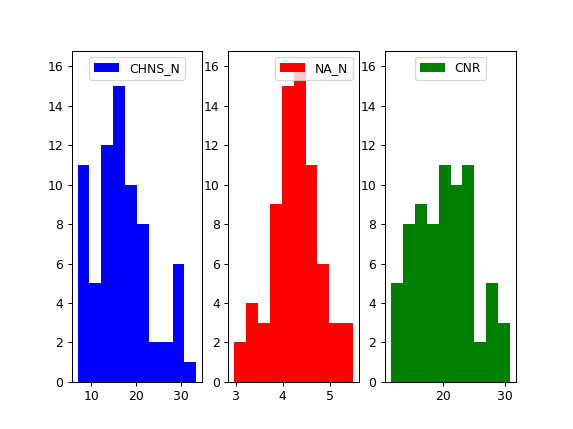

In [119]:
plt.figure()
ax1=plt.subplot(1,3,1)
plt.hist(CHNS_N, color='b', label="CHNS_N")
legend1=ax1.legend(loc='upper center') 
ax2=plt.subplot(1,3,2,sharey=ax1)
plt.hist(NA_N,color='r', label="NA_N")
legend2=ax2.legend(loc='best')
ax3=plt.subplot(1,3,3, sharey=ax2)
plt.hist(CNR,color="g", label="CNR")
legend3=ax3.legend(loc='upper center')

plt.show()

<IPython.core.display.Javascript object>


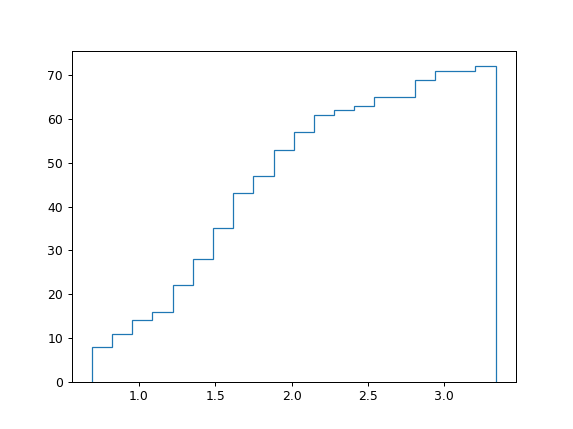

(array([  8.,  11.,  14.,  16.,  22.,  28.,  35.,  43.,  47.,  53.,  57.,
         61.,  62.,  63.,  65.,  65.,  69.,  71.,  71.,  72.]),
 array([ 0.691  ,  0.82325,  0.9555 ,  1.08775,  1.22   ,  1.35225,
         1.4845 ,  1.61675,  1.749  ,  1.88125,  2.0135 ,  2.14575,
         2.278  ,  2.41025,  2.5425 ,  2.67475,  2.807  ,  2.93925,
         3.0715 ,  3.20375,  3.336  ]),
 <a list of 1 Patch objects>)

In [104]:
plt.figure()
rahul=data["N_percent"]
plt.hist(rahul,histtype='step',cumulative=True,bins=20)

<IPython.core.display.Javascript object>


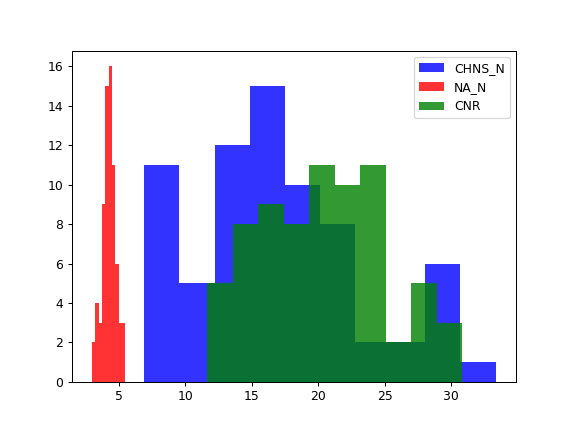

In [120]:
plt.figure()
plt.hist(CHNS_N, color='b',bins=10, label="CHNS_N",alpha=0.8)
plt.hist(NA_N,color='r',bins=10, label="NA_N",alpha=0.8)
plt.hist(CNR,color="g",bins=10, label="CNR",alpha=0.8)
plt.legend(loc='best')

plt.show()

# <font color = 'red'>Another method to plot histograms</font>

<IPython.core.display.Javascript object>


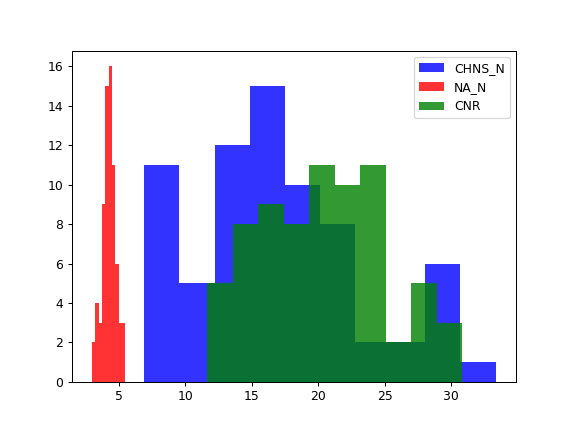

In [121]:
plt.figure()
kwargs=dict(histtype='stepfilled',alpha=0.8)
plt.hist(CHNS_N,**kwargs, color='b', label='CHNS_N')
plt.hist(NA_N,**kwargs, color='r',label='NA_N')
plt.hist(CNR,**kwargs,color='g',label='CNR')
plt.legend()

In [127]:
data.describe()

,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,114.833333,1.690590,32.958618,5.922264,16.905903,20.274777,4.271759,62.814575
std,8.292199,0.635111,10.342057,1.170489,6.351113,4.805979,0.533419,6.532327
min,101.000000,0.691000,14.693000,2.427000,6.910000,11.666483,2.966667,25.500000
25%,107.000000,1.284500,21.681250,5.356625,12.845000,16.648919,3.992500,60.000000
50%,118.500000,1.644000,38.388500,5.730500,16.440000,20.229199,4.285000,63.800571
75%,122.000000,2.034500,39.738500,6.709250,20.345000,23.679493,4.594167,66.203186
max,122.000000,3.336000,53.418000,8.628000,33.360000,30.828767,5.500000,80.300000


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
Plot_Code           72 non-null object
DAS                 72 non-null int64
N_percent           72 non-null float64
C_percent           72 non-null float64
H_percent           72 non-null float64
N_mg_by_g           72 non-null float64
CN_ratio            72 non-null float64
NA_avg_N_mg_by_g    72 non-null float64
Water_percent       72 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ KB


In [131]:
data.head(3)

,Plot_Code,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
0,D2R1I2N3,101,1.190,20.723,3.917,11.90,17.414286,4.866667,68.0
1,D2R1I2N2,101,0.891,17.949,6.053,8.91,20.144781,4.266667,58.0
2,D2R1I1N1,101,0.691,16.340,7.077,6.91,23.646889,4.766667,55.0


# <font color='red'>Filtering the data to do categorical analysis</font>

**<font color='green'>Extracting N and Water treatment data**

In [214]:
I3N3=data[data["Plot_Code"].str.upper().str.contains('I3N3')]
I3N2=data[data["Plot_Code"].str.upper().str.contains("I3N2")]
I3N1=data[data["Plot_Code"].str.upper().str.contains("I3N1")]
I1N3=data[data["Plot_Code"].str.upper().str.contains("I1N3")]
I1N2=data[data["Plot_Code"].str.lower().str.contains("i1n2")]
I1N1=data[data["Plot_Code"].str.upper().str.contains("I1N1")]
I2N1=data[data["Plot_Code"].str.upper().str.contains("I2N1")]
I2N3=data[data["Plot_Code"].str.upper().str.contains("I2N3")]
I2N2=data[data["Plot_Code"].str.upper().str.contains("I2N2")]
I1N2.shape

(12, 9)

In [216]:
avg_I3N1=I3N1.describe()
avg_I3N2=I3N2.describe()
avg_I3N3=I3N3.describe()
avg_I1N1=I1N1.describe()
avg_I1N2=I1N2.describe()
avg_I1N3=I1N3.describe()
avg_I2N1=I2N1.describe()
avg_I2N3=I2N3.describe()
avg_I2N2=I2N2.describe()
avg_I1N3.head(2)

,DAS,N_percent,C_percent,H_percent,N_mg_by_g,CN_ratio,NA_avg_N_mg_by_g,Water_percent
count,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,114.833333,1.746417,31.57425,6.339917,17.464167,18.01989,4.255556,63.569011


In [218]:
I3N_list=[avg_I3N1.iloc[1,1], avg_I3N2.iloc[1,1], avg_I3N3.iloc[1,1]]
I2N_list=[avg_I2N1.iloc[1,1], avg_I2N2.iloc[1,1], avg_I2N3.iloc[1,1]]
I1N_list=[avg_I1N1.iloc[1,1], avg_I1N2.iloc[1,1], avg_I1N3.iloc[1,1]]
IN1_list=[avg_I1N1.iloc[1,1], avg_I2N1.iloc[1,1], avg_I3N1.iloc[1,1]]
IN2_list=[avg_I1N2.iloc[1,1], avg_I2N2.iloc[1,1], avg_I3N2.iloc[1,1]]
IN3_list=[avg_I1N3.iloc[1,1], avg_I2N3.iloc[1,1], avg_I3N3.iloc[1,1]]

<IPython.core.display.Javascript object>


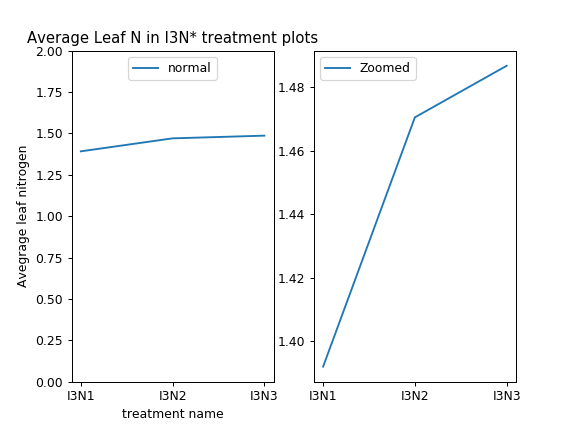

In [204]:
plt.figure()
ax1=plt.subplot(1,2,1)
plt.ylim(0,2)
plt.plot(["I3N1","I3N2","I3N3"],I3N_list, label="normal")
legend1=ax1.legend(loc='upper center') 
plt.title("Average Leaf N in I3N* treatment plots")
plt.xlabel("treatment name")
plt.ylabel("Avegrage leaf nitrogen")

ax2=plt.subplot(1,2,2)
# plt.ylim(1.3,1.6)
plt.plot(["I3N1","I3N2","I3N3"],I3N_list, label="Zoomed")
legend2=ax2.legend(loc='best')

# plt.title("Average Leaf N in I3N* treatment plots")
# plt.xlabel("treatment name")
# plt.ylabel("Avegrage leaf nitrogen")
# plt.figure()
# plt.ylim(0,2)
# plt.plot(["I3N1","I3N2","I3N3"],I3N_list)



<IPython.core.display.Javascript object>


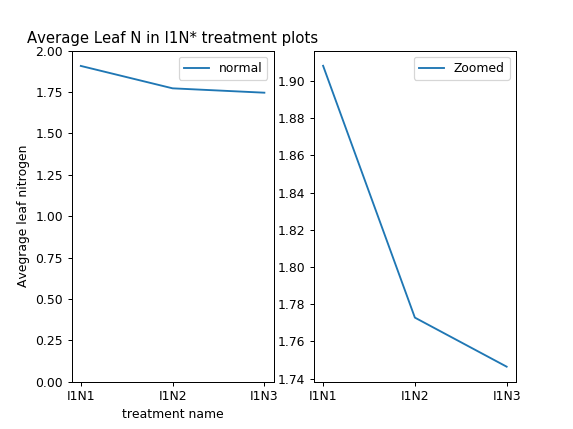

In [206]:
plt.figure()
ax1=plt.subplot(1,2,1)
plt.ylim(0,2)
plt.plot(["I1N1","I1N2","I1N3"],I1N_list, label="normal")
legend1=ax1.legend(loc='best') 
plt.title("Average Leaf N in I1N* treatment plots")
plt.xlabel("treatment name")
plt.ylabel("Avegrage leaf nitrogen")

ax2=plt.subplot(1,2,2)
# plt.ylim(1.3,1.6)
plt.plot(["I1N1","I1N2","I1N3"],I1N_list, label="Zoomed")
legend2=ax2.legend(loc='best')

<IPython.core.display.Javascript object>


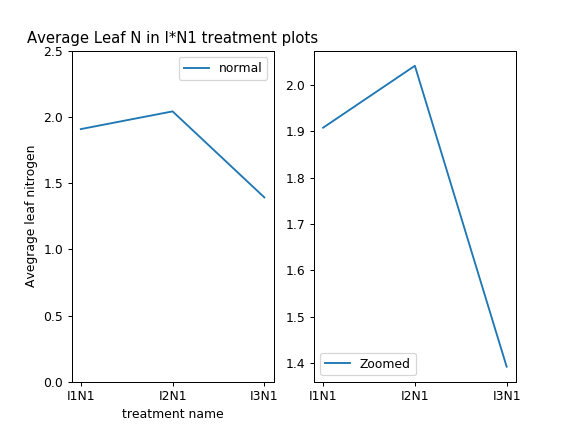

In [211]:
plt.figure()
ax1=plt.subplot(1,2,1)
plt.ylim(0,2.5)
plt.plot(["I1N1","I2N1","I3N1"],IN1_list, label="normal")
legend1=ax1.legend(loc='best') 
plt.title("Average Leaf N in I*N1 treatment plots")
plt.xlabel("treatment name")
plt.ylabel("Avegrage leaf nitrogen")

ax2=plt.subplot(1,2,2)
# plt.ylim(1.3,1.6)
plt.plot(["I1N1","I2N1","I3N1"],IN1_list, label="Zoomed")
legend2=ax2.legend(loc='best')

<IPython.core.display.Javascript object>


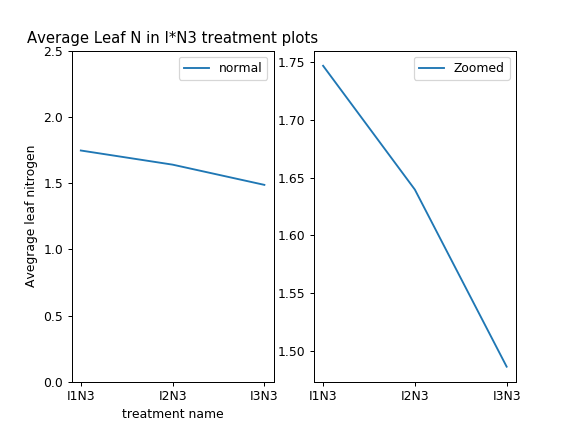

In [212]:
plt.figure()
ax1=plt.subplot(1,2,1)
plt.ylim(0,2.5)
plt.plot(["I1N3","I2N3","I3N3"],IN3_list, label="normal")
legend1=ax1.legend(loc='best') 
plt.title("Average Leaf N in I*N3 treatment plots")
plt.xlabel("treatment name")
plt.ylabel("Avegrage leaf nitrogen")

ax2=plt.subplot(1,2,2)
# plt.ylim(1.3,1.6)
plt.plot(["I1N3","I2N3","I3N3"],IN3_list, label="Zoomed")
legend2=ax2.legend(loc='best')

<IPython.core.display.Javascript object>


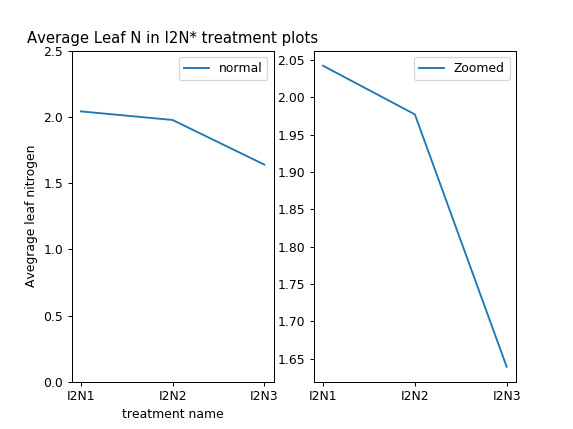

In [220]:
plt.figure()
ax1=plt.subplot(1,2,1)
plt.ylim(0,2.5)
plt.plot(["I2N1","I2N2","I2N3"],I2N_list, label="normal")
legend1=ax1.legend(loc='best') 
plt.title("Average Leaf N in I2N* treatment plots")
plt.xlabel("treatment name")
plt.ylabel("Avegrage leaf nitrogen")

ax2=plt.subplot(1,2,2)
# plt.ylim(1.3,1.6)
plt.plot(["I2N1","I2N2","I2N3"],I2N_list, label="Zoomed")
legend2=ax2.legend(loc='best')

<IPython.core.display.Javascript object>


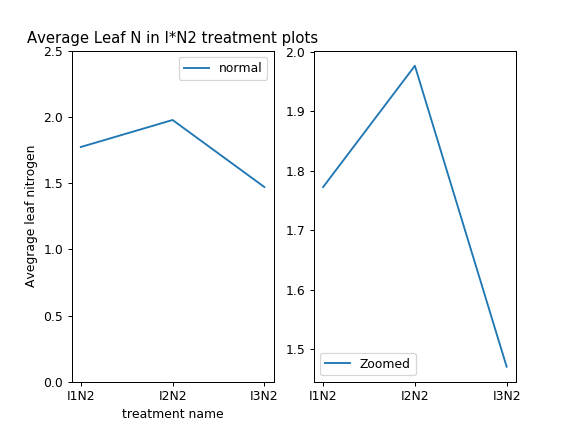

In [222]:
plt.figure()
ax1=plt.subplot(1,2,1)
plt.ylim(0,2.5)
plt.plot(["I1N2","I2N2","I3N2"],IN2_list, label="normal")
legend1=ax1.legend(loc='best') 
plt.title("Average Leaf N in I*N2 treatment plots")
plt.xlabel("treatment name")
plt.ylabel("Avegrage leaf nitrogen")

ax2=plt.subplot(1,2,2)
# plt.ylim(1.3,1.6)
plt.plot(["I1N2","I2N2","I3N2"],IN2_list, label="Zoomed")
legend2=ax2.legend(loc='best')